# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Using Supervised learning to find whether the quality of wine is good or bad.


 Wine is an alcoholic beverage produced through the partial or total fermentation of  grapes. Other fruits and plants like berries, apples, cherries, dandelions, and palm can also be fermented. It is one of the most consumed drink by the people.Wine sector contributes a lot of economy to most of the countries like UK , Portugal etc. Producing a good quality of wine is not an easy task .According to the technical point of view, a good quality wine consists of factors meeting specific criteria and set according to considerations of scientific, chemical and technical factors, which can always be verified analytically. The quality of wine is mainly affected by the ingredients used for making it. So, we use these ingredients to predict the quality of the wine.The major motivation for exploring this project is to develop the skill and understanding how to work out on real time datasets. Our model is well suited for the field in testing the quality of wine.

## Problem Statement

The aim of project is to determine of the quality of wine.  Since the task is to figure out whether the quality of the wine is good or bad based on the chemical composition in   manufacturing the wine. And hence we have to tackle with a binary classification problem that has two possible outcomes (‘0’ for bad quality and ‘1’ for good quality). I am going to use 11 features (chemical composition involved in the manufacturing of wine ) in the data as predictor variables and Quality ( Quality rating ) as the target variable. I am modifying the data of Quality attribute to 1 and 0 depending on the quality rating of wine greater than 5 or not. By using machine learning techniques to predict the quality of wine and compare their performance can determine quality of wine.

## Evaluation Metrics


In this project I will use the evaluation metric of fbeta_score. It measures the effectiveness of retrieval with respect to a user who attaches beta times as  much importance to recall as precision. I didn’tchoose accuracy score as my metric because my data is unbalanced.
                     
$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$


# Analysis

## Data Exploration

### Importing Necessary Libraries which required for the project

In [221]:
import numpy as np                                        
import pandas as pd                                       
%matplotlib inline
import seaborn as sns                                     # For Visualizations
from IPython.display import display                     # To display dataframes 
from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler         # To standardize the data
from sklearn.linear_model import LogisticRegression      
from sklearn.tree import DecisionTreeClassifier     
from sklearn.ensemble import AdaBoostClassifier          
from sklearn.model_selection import GridSearchCV         
from sklearn.metrics import fbeta_score             
from sklearn.metrics import make_scorer             

### Reading Data 


#### read from CSV File into Pandas DataFrame 

In [222]:
file_name = 'winequality-white.csv'

# Reading the data from csv
data = pd.read_csv( filepath_or_buffer = file_name , sep = ';' )

### Data Insights

In [223]:
# print data shape(No. of Attributes and Instances  in the data)

print 'datashape:',data.shape
# Display first five Observations
display(data.head(n=5))

datashape: (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Describing the Data

In [224]:
# Description of the data to get some insights

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


There are no missing values in the data is identified from the above execution.

## Exploratory Visualization

C:\Users\AMRITA AGARWAL\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


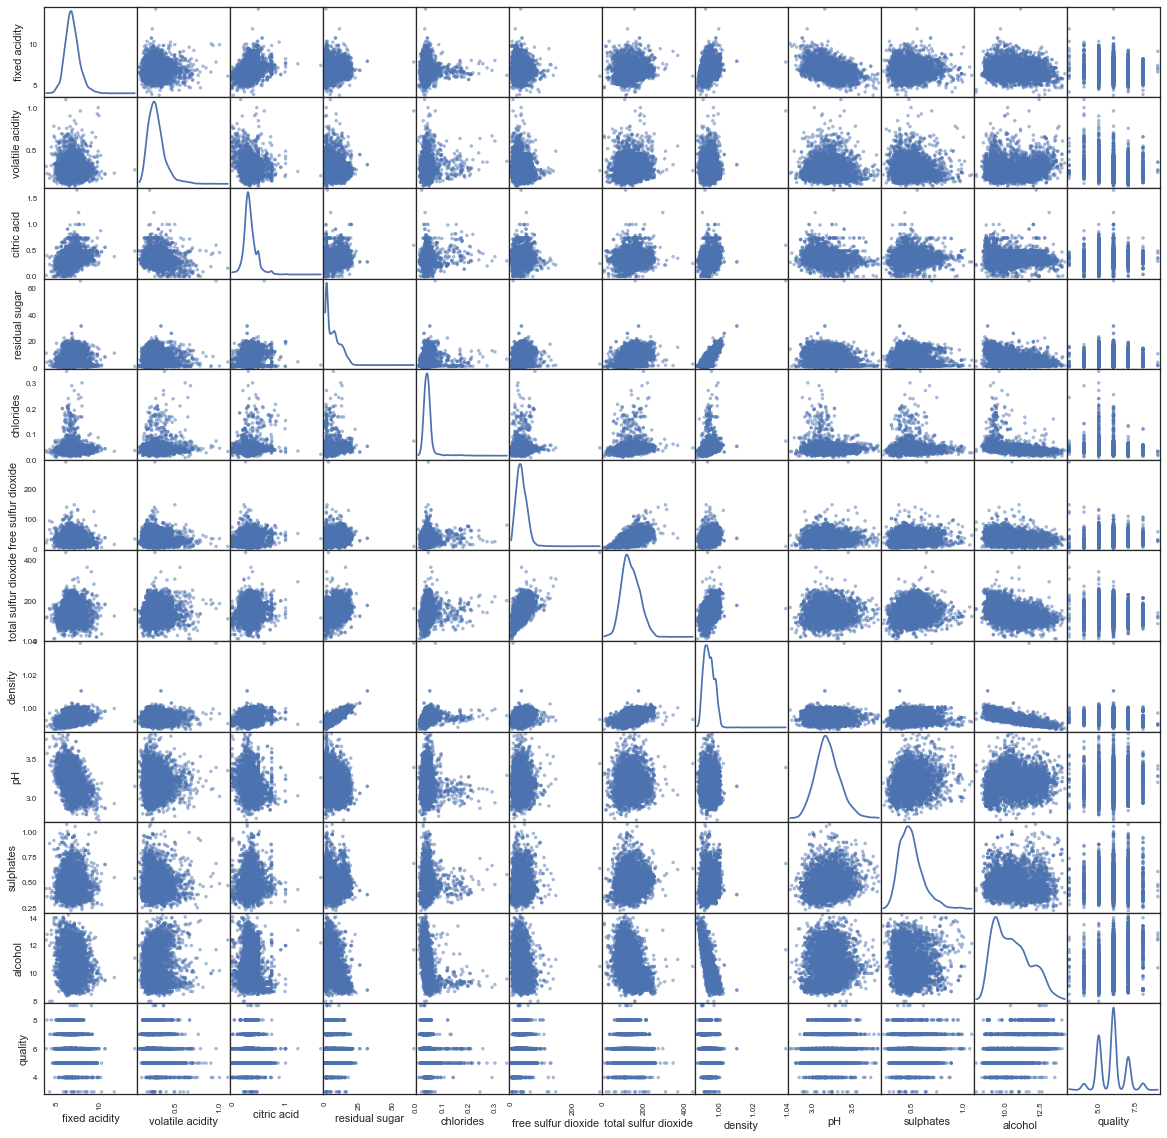

In [225]:
# plotting a scatter matrix to know the relationship ( correlation ) between the features
pd.scatter_matrix( data , alpha = 0.5 , figsize = ( 20 , 20 ) , diagonal = 'kde' );

From the above visualizations  , it is clear that most of the features are skewly - distributed . The problem with this type of data is very large values and very small values may effect the performance of our model. So , it is better to standardize them.

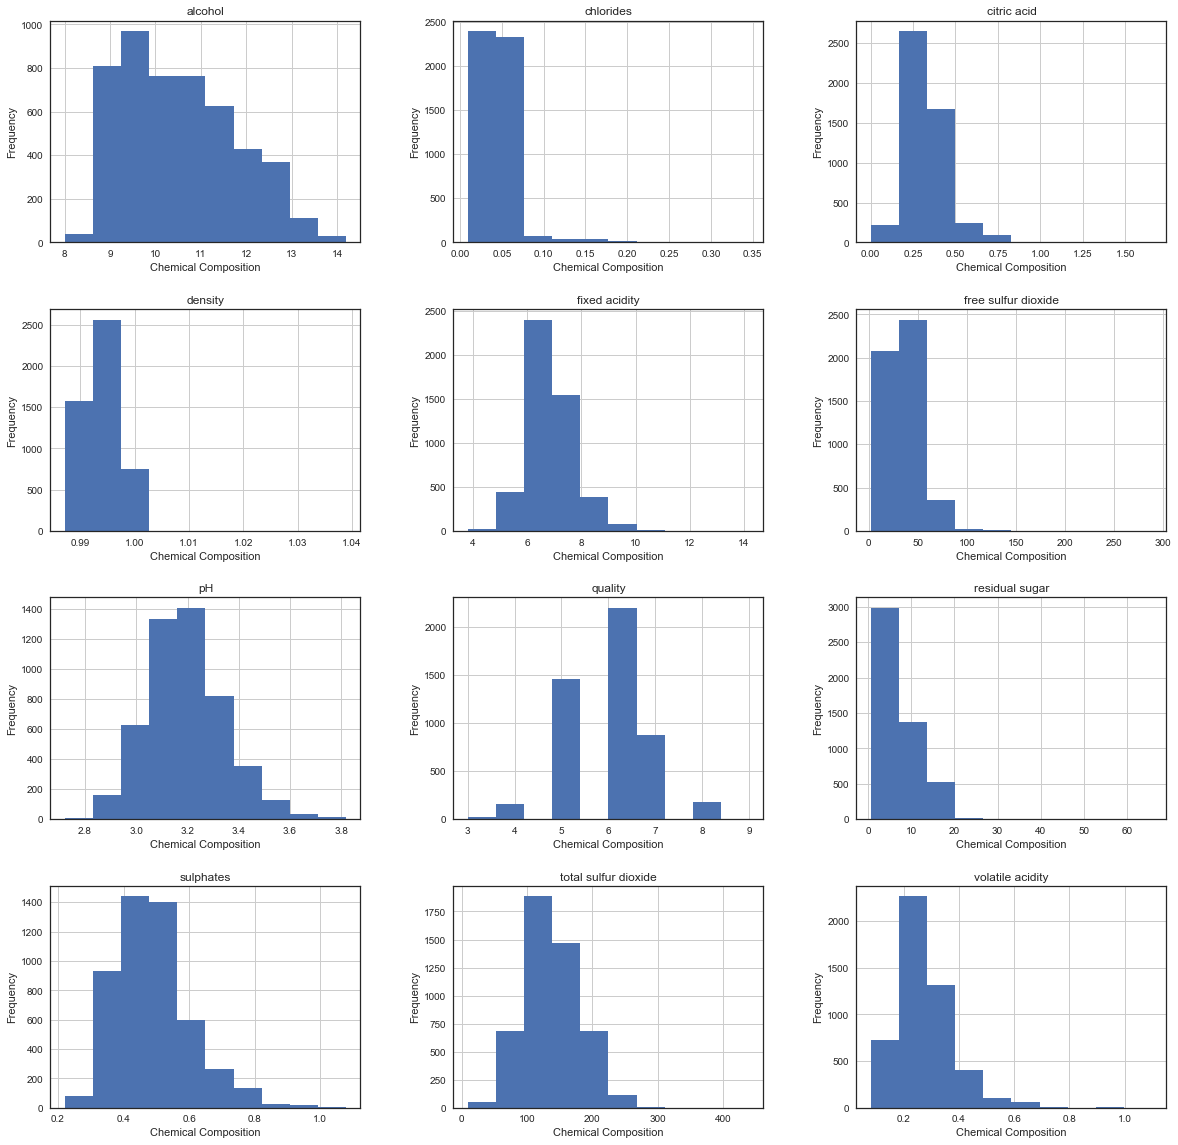

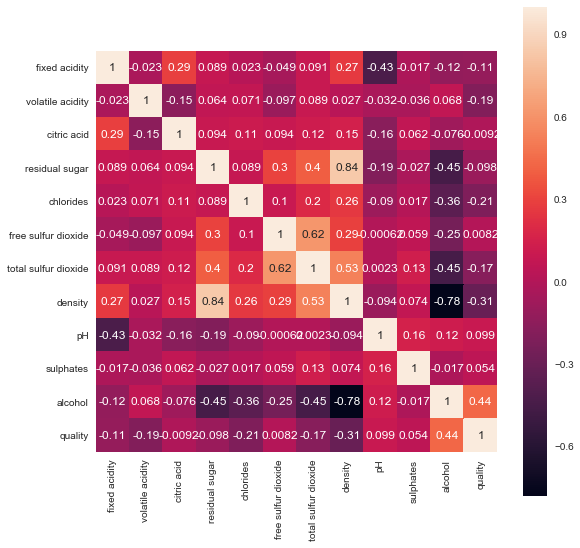

In [226]:
seri = data.hist(figsize=(20,20))
#To get copy of the array collapsed into one dimension,we use flatten.
for x in seri.flatten():
    x.set_xlabel('Chemical Composition')
    x.set_ylabel('Frequency')
f ,x = plt.subplots(figsize = ( 9 , 9 )) 
sns.set( style = 'white' )
correlation =data.corr()

# Plotting  heatmap

sns.heatmap(correlation,annot=True,square=True)

From the above heatmap , what we can infer is there is that there is both positive and negative correlation exists in between the features . 

Most of the features are not highly correlated . But for some , there exists a reasonable amount of correlation.
Some of the observed corelations:
pH - Fixed Acidity  :   -0.43
It is reasonable because pH depends on acidity . It is negative correlation which means as acidity increases pH decreases.
Residual sugar - Density : 0.84
Residual sugar and Density are positively correlated . If there is more residual sugar , then density of wine also more.
Free sulfur di-oxide   -  Total sulfur di-oxide : 0.62
If the content of one feature increases ,then other feature will also increase . Therefore , there exists postive correlation.
Residual sugar -  Total sulfur di-oxide : 0.4
If the content of one feature increases ,then other feature will also increase . Therefore , there exists postive correlation.
Alcohol - Quality :  0.44
If the content of one feature increases ,then other feature will also increase . Therefore , there exists postive correlation.
Alcohol - Density : -0.78
If the content of one feature increases ,then other feature will  decrease . Therefore , there exists negative correlation.


## Algorithms and Techniques

I have chosen three Supervised Classification Algorithms .Then I compare the performance of each model and select the best one. 

1.Logistic Regression :
I have choosen Logistic Regression as it is very simple classification algorithm. It is more robust and to apply this algorithm , it doesn't require linear relationships exists in between predictors and target variables. The problem with this algorithm is it is more prone to over-fitting.

2.Decision Trees:This model is choosen as it converts our classification task into tree like structure which is simple to understand and interpret. Prediction is quite fast,easy visualization.Disadvantage is can take a lot of memory (with more features ,decision tree is  deeper and larger),overfitting happens very easily.Since,this model can handle both numerical and categorical data ,able to handle lot of data easily and  easy to visualize.

3.Adaboost: Adaboost is one of the ensemble model.An efficient algorithm which boosts the performance (predictive power ) of a model by combining a set of weak learners into a single strong learner.Simple models can be combined to build a complex model, which is computationally fast and quite robust to overfitting. Ensemble methods are considered as high quality classifiers.This model produce more accurate predictions. 



## Benchmark

I will use Logistic regression is used as benchmark model. Fbeta_score of benchmark model is used as reference and other model will be judge to perform better if their fbeta score will be greater than Logistic regression model.

## Data Preprocessing

### Missing Values

In [227]:
# Finding Null values

data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing values present in the data

### Outliers

In [228]:
# Identifying outliers in each attribute

for feature in data.keys():
    
    Q1 = np.percentile(data[feature], q=25)
    Q3 = np.percentile(data[feature], q=75)
    IQR = Q3 - Q1
    step = 1.5 * IQR
    print("Outliers for  '{}':".format(feature))
    display( data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))] )
    


Outliers for  'fixed acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
98,9.8,0.360,0.46,10.50,0.038,4.0,83.0,0.99560,2.89,0.30,10.1,4
169,9.8,0.420,0.48,9.85,0.034,5.0,110.0,0.99580,2.87,0.29,10.0,5
207,10.2,0.440,0.88,6.20,0.049,20.0,124.0,0.99680,2.99,0.51,9.9,4
294,9.1,0.590,0.38,1.60,0.066,34.0,182.0,0.99680,3.23,0.38,8.5,3
358,10.0,0.200,0.39,1.40,0.050,19.0,152.0,0.99400,3.00,0.42,10.4,6
551,9.2,0.250,0.34,1.20,0.026,31.0,93.0,0.99160,2.93,0.37,11.3,7
555,9.2,0.250,0.34,1.20,0.026,31.0,93.0,0.99160,2.93,0.37,11.3,7
656,9.0,0.270,0.35,4.90,0.028,27.0,95.0,0.99320,3.04,0.40,11.3,6
774,9.1,0.270,0.45,10.60,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
847,9.2,0.340,0.27,1.20,0.026,17.0,73.0,0.99210,3.08,0.39,10.8,5


Outliers for  'volatile acidity':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.20,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
20,6.2,0.660,0.48,1.20,0.029,29.0,75.0,0.98920,3.33,0.39,12.800000,8
23,7.6,0.670,0.14,1.50,0.074,25.0,168.0,0.99370,3.05,0.51,9.300000,5
79,6.7,0.540,0.28,5.40,0.060,21.0,105.0,0.99490,3.27,0.37,9.000000,5
147,6.4,0.595,0.14,5.20,0.058,15.0,97.0,0.99510,3.38,0.36,9.000000,4
178,6.0,0.670,0.07,1.20,0.060,9.0,108.0,0.99310,3.11,0.35,8.700000,4
188,6.8,0.530,0.35,3.80,0.034,26.0,109.0,0.99060,3.26,0.57,12.700000,8
202,6.9,0.540,0.32,13.20,0.050,53.0,236.0,0.99730,3.20,0.50,9.600000,5
208,6.8,0.570,0.29,2.20,0.040,15.0,77.0,0.99380,3.32,0.74,10.200000,5
221,7.2,0.685,0.21,9.50,0.070,33.0,172.0,0.99710,3.00,0.55,9.100000,6


Outliers for  'citric acid':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
14,8.3,0.420,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,0.67,9.70,5
16,6.3,0.480,0.04,1.10,0.046,30.0,99.0,0.99280,3.24,0.36,9.60,6
54,6.8,0.200,0.59,0.90,0.147,38.0,132.0,0.99300,3.05,0.38,9.10,6
62,7.0,0.470,0.07,1.10,0.035,17.0,151.0,0.99100,3.02,0.34,10.50,5
65,6.2,0.350,0.03,1.20,0.064,29.0,120.0,0.99340,3.22,0.54,9.10,5
84,7.1,0.430,0.61,11.80,0.045,54.0,155.0,0.99740,3.11,0.45,8.70,5
85,7.1,0.440,0.62,11.80,0.044,52.0,152.0,0.99750,3.12,0.46,8.70,6
86,7.2,0.390,0.63,11.00,0.044,55.0,156.0,0.99740,3.09,0.44,8.70,6
88,7.1,0.430,0.61,11.80,0.045,54.0,155.0,0.99740,3.11,0.45,8.70,5
89,7.1,0.440,0.62,11.80,0.044,52.0,152.0,0.99750,3.12,0.46,8.70,6


Outliers for  'residual sugar':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1608,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
4480,5.9,0.220,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5


Outliers for  'chlorides':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
23,7.6,0.670,0.14,1.50,0.074,25.0,168.0,0.99370,3.05,0.51,9.30,5
35,7.3,0.280,0.43,1.70,0.080,21.0,123.0,0.99050,3.19,0.42,12.80,5
40,6.7,0.230,0.39,2.50,0.172,63.0,158.0,0.99370,3.11,0.36,9.40,6
41,6.7,0.240,0.39,2.90,0.173,63.0,157.0,0.99370,3.10,0.34,9.40,6
54,6.8,0.200,0.59,0.90,0.147,38.0,132.0,0.99300,3.05,0.38,9.10,6
60,6.8,0.220,0.24,4.90,0.092,30.0,123.0,0.99510,3.03,0.46,8.60,6
110,6.5,0.170,0.54,8.50,0.082,64.0,163.0,0.99590,2.89,0.39,8.80,6
124,6.4,0.130,0.47,1.60,0.092,40.0,158.0,0.99280,3.21,0.36,9.80,6
194,6.4,0.290,0.44,3.60,0.200,75.0,181.0,0.99420,3.02,0.41,9.10,5
195,6.4,0.300,0.45,3.50,0.197,76.0,180.0,0.99420,3.02,0.39,9.10,6


Outliers for  'free sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
67,6.7,0.250,0.13,1.20,0.041,81.0,174.0,0.99200,3.14,0.42,9.8,5
297,7.2,0.190,0.46,3.80,0.041,82.0,187.0,0.99320,3.19,0.60,11.2,7
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
395,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
405,6.8,0.270,0.12,1.30,0.040,87.0,168.0,0.99200,3.18,0.41,10.0,5
459,6.1,0.430,0.35,9.10,0.059,83.0,249.0,0.99710,3.37,0.50,8.5,5
659,6.8,0.290,0.16,1.40,0.038,122.5,234.5,0.99220,3.15,0.47,10.0,4
752,6.7,0.200,0.42,14.00,0.038,83.0,160.0,0.99870,3.16,0.50,9.4,6
766,6.7,0.500,0.63,13.40,0.078,81.0,238.0,0.99880,3.08,0.44,9.2,5


Outliers for  'total sulfur dioxide':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
227,7.1,0.250,0.32,10.30,0.041,66.0,272.0,0.99690,3.17,0.52,9.1,6
325,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
387,6.3,0.390,0.35,5.90,0.040,82.5,260.0,0.99410,3.12,0.66,10.1,5
740,6.9,0.390,0.40,4.60,0.022,5.0,19.0,0.99150,3.31,0.37,12.6,3
1417,8.6,0.550,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
1931,7.1,0.490,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3
1940,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
1942,8.3,0.360,0.57,15.00,0.052,35.0,256.0,1.00010,2.93,0.64,8.6,5
2127,9.1,0.330,0.38,1.70,0.062,50.5,344.0,0.99580,3.10,0.70,9.5,5
2378,9.4,0.230,0.56,16.45,0.063,52.5,282.0,1.00098,3.10,0.51,9.3,5


Outliers for  'density':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1653,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1663,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
2781,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
3619,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3623,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6


Outliers for  'pH':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
72,6.0,0.270,0.28,4.80,0.063,31.0,201.0,0.99640,3.69,0.71,10.0,5
115,5.5,0.485,0.00,1.50,0.065,8.0,103.0,0.99400,3.63,0.40,9.7,4
250,5.9,0.210,0.28,4.60,0.053,40.0,199.0,0.99640,3.72,0.70,10.0,4
320,6.0,0.100,0.24,1.10,0.041,15.0,65.0,0.99270,3.61,0.61,10.3,7
507,6.0,0.240,0.27,1.90,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
509,6.0,0.240,0.27,1.90,0.048,40.0,170.0,0.99380,3.64,0.54,10.0,7
830,7.3,0.205,0.31,1.70,0.060,34.0,110.0,0.99630,3.72,0.69,10.5,6
834,7.3,0.205,0.31,1.70,0.060,34.0,110.0,0.99630,3.72,0.69,10.5,6
892,5.9,0.260,0.30,1.00,0.036,38.0,114.0,0.99280,3.58,0.48,9.4,5
928,6.5,0.250,0.35,12.00,0.055,47.0,179.0,0.99800,3.58,0.47,10.0,5


Outliers for  'sulphates':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
80,6.8,0.220,0.31,1.4,0.053,34.0,114.0,0.99290,3.39,0.77,10.600000,6
154,8.2,0.230,0.40,7.5,0.049,12.0,76.0,0.99660,3.06,0.84,9.700000,6
209,6.1,0.400,0.31,0.9,0.048,23.0,170.0,0.99300,3.22,0.77,9.500000,6
245,6.1,0.180,0.36,2.0,0.038,20.0,249.5,0.99230,3.37,0.79,11.300000,6
339,6.6,0.180,0.35,1.5,0.049,49.0,141.0,0.99340,3.43,0.85,10.200000,7
357,6.1,0.360,0.33,1.1,0.050,24.0,169.0,0.99270,3.15,0.78,9.500000,6
411,7.3,0.280,0.36,12.7,0.040,38.0,140.0,0.99800,3.30,0.79,9.600000,6
415,7.3,0.280,0.36,12.7,0.040,38.0,140.0,0.99800,3.30,0.79,9.600000,6
530,6.4,0.100,0.35,4.9,0.048,31.0,103.0,0.99470,3.43,0.79,9.700000,6
563,7.4,0.300,0.22,1.4,0.046,16.0,135.0,0.99280,3.08,0.77,10.400000,7


Outliers for  'alcohol':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


Outliers for  'quality':


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
17,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
20,6.2,0.660,0.48,1.2,0.029,29.0,75.0,0.98920,3.33,0.39,12.8,8
22,6.8,0.260,0.42,1.7,0.049,41.0,122.0,0.99300,3.47,0.48,10.5,8
68,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
74,6.7,0.230,0.31,2.1,0.046,30.0,96.0,0.99260,3.33,0.64,10.7,8
158,5.2,0.440,0.04,1.4,0.036,43.0,119.0,0.98940,3.36,0.33,12.1,8
159,5.2,0.440,0.04,1.4,0.036,43.0,119.0,0.98940,3.36,0.33,12.1,8
188,6.8,0.530,0.35,3.8,0.034,26.0,109.0,0.99060,3.26,0.57,12.7,8
251,8.5,0.260,0.21,16.2,0.074,41.0,197.0,0.99800,3.02,0.50,9.8,3
253,5.8,0.240,0.44,3.5,0.029,5.0,109.0,0.99130,3.53,0.43,11.7,3


There are many outliers present in the data. But removing all these outilers may lead to loss of information. I am not going to remove them as manufacturers add extra chemicals(composition)  to improve the taste and quality. 

## Converting quality variable to suit binary classification task:
 I will use minmax scaling. And all the resulting values will be in the range of 0 and 1. 


In [229]:
# Seperate target variable
X = data.drop( 'quality' , axis = 1 )
# If quality of wine is greater than 5 ,then quality is good i.e., target variable is 1 else 0 for bad quaity
quality_raw=data['quality']
y = pd.Series([ 1 if x > 5 else 0 for x in quality_raw ])


### Splitting data

In [230]:
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size = 0.2 , random_state = 10 )
print(X_train.shape , y_train.shape)
print(X_test.shape , y_test.shape)
# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

((3918, 11), (3918,))
((980, 11), (980,))
Training set has 3918 samples.
Testing set has 980 samples.


### Standardizing the Data

In [231]:
# Standardizing the data


scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
print X_train_scaled.mean(axis=0)
print X_test_scaled.mean(axis=0)

[ 0.29412696  0.19489485  0.20062178  0.08804495  0.12995591  0.11579185
  0.29950795  0.13311767  0.4148186   0.3132976   0.40502904]
[ 0.29214089  0.19219188  0.20411237  0.09194551  0.13448689  0.11711228
  0.30267058  0.13432817  0.41603364  0.31568581  0.40751756]


## Implementation

### Performance of Benchmark model

In [232]:
def performance(clf, X_train_scaled, y_train, X_test_scaled, y_test): 
    
    print 'Classifier:',clf.__class__.__name__
    clf.fit(X_train , y_train)     
    y_preds = clf.predict(X_test)
    print 'F-score is',fbeta_score( y_test , y_preds , beta = 0.5)
    

In [233]:
clf1 = LogisticRegression(random_state = 10)
performance(clf1 , X_train_scaled, y_train, X_test_scaled, y_test)  

Classifier: LogisticRegression
F-score is 0.803256445047


### Testing with other Algorithms

In [234]:
clf2 = DecisionTreeClassifier(random_state = 0)
performance(clf2 , X_train_scaled, y_train, X_test_scaled, y_test) 
clf3 = AdaBoostClassifier(random_state = 30)
performance(clf3 , X_train_scaled, y_train, X_test_scaled, y_test) 



Classifier: DecisionTreeClassifier
F-score is 0.838176812481
Classifier: AdaBoostClassifier
F-score is 0.808425846855


We got almost similar F - score score for AdaBoost classifier & Decision Tree classifier.I'm choosing Ada Boost Classifier model because it has more hyper parameters than Decision Trees which may increase F - score.

### Hyper Parameter Tuning using Grid Search


In [235]:
clf = AdaBoostClassifier()

n_params = { 'n_estimators' : [10 , 50 , 75 ] , 'learning_rate' : [0.1 , 0.2, 0.3 , 0.5] }
scorer = make_scorer( fbeta_score , beta=0.5 )
grid = GridSearchCV(clf , param_grid=n_params , scoring=scorer )
best_fit  = grid.fit( X_train , y_train )
best_model=best_fit.best_estimator_

In [236]:

performance(best_model , X_train_scaled, y_train, X_test_scaled, y_test)
y_preds = best_model.predict(X_test)

Classifier: AdaBoostClassifier
F-score is 0.820345706999


## Model Evaluation and Validation

The final model  AdaBoost Classifier with hyper parameter tuning using Grid Search  achieved an F - score of  82%.

## Justification

|     Metric     |  Benchmark model  | Un-optimized model  |    Optimized model    |
| :------------: | :---------------: | :-------------:     | :-------------------: | 
| F-score        |      0.8032       |       0.8084        |        0.8203         |


 we can clearly say that our final model works pretty well than our Benchmark model . As our final model got F-score of  82% the model is quite significant to solve the problem.

## Conclusion
### Free-Form Visualization

Text(0,0.5,u'Frequency')

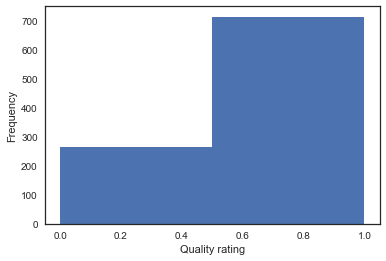

In [237]:
#A visualization has been provided that emphasizes an important quality about the project
plt.hist(y_preds , bins = 2 )
plt.xlabel('Quality rating')
plt.ylabel('Frequency')

We can see that data is unbalanced.

Which means data contains more examples of good quality wine than bad quality wine.

## Reflection

First , I read the data using Pandas DataFrame.Then I defined my problem statement as to predict the quality of wine.I found the no. of instances and attributes present in the data at the Data exploration step. I have learn using heatmap and used it to check whether the features are correlated or not.  I tried to find missing values but  no missing values are found. Then I tried to find out Outliers in the data.I defined a Benchmark model which is Logistic Regressor. Fbeta_score of benchmark model is used as reference and other model will be judge to perform better if their fbeta score will be greater than Logistic regression model. After ,I haven chosen  Decision Tree and Ada Boost Classifier and tried to improve the performance of Ada Boost Classifier with Grid Search technique.I liked this project

## Improvement

Using CNN architecture,we can achieve better performance.
More balanced data would increase performance.
The algorithmms like XGBoost, gradient descent may increase performance.Features like Clever Penalisation of Trees,
 Proportional shrinking of leaf nodes made XGBoost popular.